# Classification of MNIST digits with convolutional layers


## Loading the image data



In [1]:
from keras.datasets import cifar10

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_images_original.shape

(50000, 32, 32, 3)

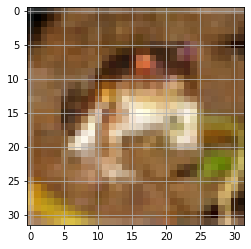

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.grid(None)
plt.show()

In [7]:
train_labels.shape

(50000, 10)

In [8]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [10]:
np.argmax(train_labels[0])

6

In [0]:
train_labels_original[0]
from keras import models
from keras import layers

## Overfitting convolutional layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)             

##Underfitting convolutional layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 5)         140       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 10)        460       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 10)          910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40)               

##Good fitting convolutional layers

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)         0         


## The compilation step

In [13]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## The training step

In [14]:
epochs = 7
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/7





50000/50000 [==============================] - 13s 264us/step - loss: 1.6716 - acc: 0.3926 - val_loss: 1.4134 - val_acc: 0.4793
Epoch 2/7
50000/50000 [==============================] - 6s 115us/step - loss: 1.2812 - acc: 0.5452 - val_loss: 1.1633 - val_acc: 0.5975
Epoch 3/7
50000/50000 [==============================] - 6s 112us/step - loss: 1.1314 - acc: 0.6030 - val_loss: 0.9710 - val_acc: 0.6612
Epoch 4/7
50000/50000 [==============================] - 6s 111us/step - loss: 1.0320 - acc: 0.6399 - val_loss: 0.9955 - val_acc: 0.6534
Epoch 5/7
50000/50000 [==============================] - 6s 113us/step - loss: 0.9681 - acc: 0.6613 - val_loss: 1.2569 - val_acc: 0.5812
Epoch 6/7
50000/50000 [==============================] - 6s 112us/step - loss: 0.9254 - acc: 0.6796 - val_loss: 1.0087 - val_acc: 0.6389
Epoch 7/7
50000/50000 [==

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

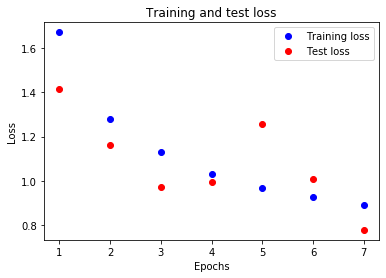

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

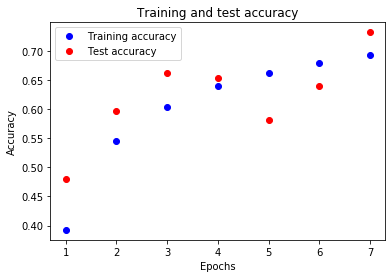

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Weired behaviour

Why is the test accuracy after epoch 1 so much better than the train accuracy?



## Showing some misclassified digits

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.47042762e-05, 3.28412443e-06, 1.13816059e-03, 9.48900759e-01,
       3.95147043e-04, 3.89506407e-02, 1.04172276e-02, 1.21596786e-04,
       7.41606527e-06, 1.07538972e-06], dtype=float32)

In [0]:
np.argmax(predictions[0])

3

In [0]:
test_labels_original[0]

array([3])

In [0]:
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

In [0]:
predicted_labels

array([3, 8, 1, ..., 5, 4, 7], dtype=uint8)

In [0]:
wrong_indices = [i for i in range(10000) if predicted_labels[i] != test_labels_original[i]]

In [0]:
# The quantity below is equal to the test accuracy reported by the network fit method.
1.0 - len(wrong_indices) / 10000.0

0.6898

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]  

In [0]:
predicted_labels[wrong_index]

4

In [0]:
test_labels_original[wrong_index]

array([5])

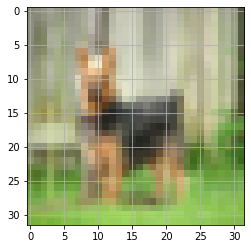

In [0]:
plt.imshow(test_images_original[wrong_index])
plt.grid(None)
plt.show()